In [103]:
# Import libraries
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import mplleaflet
import matplotlib.pyplot as plt
import requests
import json

from utility import *


from k_means_constrained import KMeansConstrained
from scipy.spatial import distance_matrix

In [2]:
# Load the CSV file with flower data
columns=[   'Aanhef', 'Voorletters', 'Tussenvoegsel', 'Achternaam', 
            'Straatnaam', 'Huisnummer', 'Toevoeging', 'Postcode', 'Woonplaats'  ]

# Obtain the csv as a pandas dataframe
path = "flower_input.csv"
flower_dataframe = pd.read_csv(path, delimiter=";")

# Return the pandas dataframe
flower_dataframe.head()

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats
0,Company,NaN,NaN,Itility,Flight Forum,3360,NaN,5657 EW,Eindhoven
1,Mevr.,N.J.,NaN,Verheggen,Venuslaan,97,NaN,5632 HB,Eindhoven
2,Mevr.,M.H.C.,NaN,Verheijen,Imkerstraat,244,NaN,5623 DK,Eindhoven
3,Dhr. en mevr.,NaN,NaN,Vermeulen,Antwerpenlaan,25,NaN,5628 XC,Eindhoven
4,Mevr.,G.,NaN,Verschuren,Venuslaan,711,NaN,5632 HV,Eindhoven


In [3]:
# Enrich input data
flower_dataframe_enriched = enrich_flower_data(flower_dataframe)
# print(flower_dataframe_enriched.head(5).to_string())
flower_dataframe_enriched.head()

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Name,Address,Size
0,Company,nan,nan,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Company Itility,Flight Forum 3360 5657EW Eindhoven,1
1,Mevr.,N.J.,nan,Verheggen,Venuslaan,97,NaN,5632HB,Eindhoven,Mevr. N.J. Verheggen,Venuslaan 97 5632HB Eindhoven,1
2,Mevr.,M.H.C.,nan,Verheijen,Imkerstraat,244,NaN,5623DK,Eindhoven,Mevr. M.H.C. Verheijen,Imkerstraat 244 5623DK Eindhoven,1
3,Dhr. en mevr.,nan,nan,Vermeulen,Antwerpenlaan,25,NaN,5628XC,Eindhoven,Dhr. en mevr. Vermeulen,Antwerpenlaan 25 5628XC Eindhoven,1
4,Mevr.,G.,nan,Verschuren,Venuslaan,711,NaN,5632HV,Eindhoven,Mevr. G. Verschuren,Venuslaan 711 5632HV Eindhoven,1


In [5]:
# Transform addresses to geolocation
flower_dataframe_geo, failed_addresses_df = add_geolocation_to_flower_dataframe(flower_dataframe_enriched)
flower_dataframe_geo.head(5)

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Name,Address,Size,Longitude,Latitude
0,Company,nan,nan,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Company Itility,Flight Forum 3360 5657EW Eindhoven,1,5.404500,51.450187
1,Mevr.,N.J.,nan,Verheggen,Venuslaan,97,NaN,5632HB,Eindhoven,Mevr. N.J. Verheggen,Venuslaan 97 5632HB Eindhoven,1,5.488001,51.468241
2,Mevr.,M.H.C.,nan,Verheijen,Imkerstraat,244,NaN,5623DK,Eindhoven,Mevr. M.H.C. Verheijen,Imkerstraat 244 5623DK Eindhoven,1,5.473166,51.454618
3,Dhr. en mevr.,nan,nan,Vermeulen,Antwerpenlaan,25,NaN,5628XC,Eindhoven,Dhr. en mevr. Vermeulen,Antwerpenlaan 25 5628XC Eindhoven,1,5.477722,51.480267
4,Mevr.,G.,nan,Verschuren,Venuslaan,711,NaN,5632HV,Eindhoven,Mevr. G. Verschuren,Venuslaan 711 5632HV Eindhoven,1,5.489439,51.475132


In [61]:
# Visualize
fig, ax = plt.subplots(figsize=(16,16))
flower_dataframe_geo.plot(x='Longitude', y='Latitude', kind='scatter', s=40, 
                color='red', ax=ax)
fig = mplleaflet.display(fig=fig)
fig

/home/stijn/anaconda3/envs/spatial/lib/python3.7/site-packages/mplleaflet/mplexporter/exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
/home/stijn/anaconda3/envs/spatial/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [105]:
df_cluster = pd.read_csv("flower_geolocations.csv", index_col=0)

In [106]:
locations = df_cluster[['Longitude', 'Latitude']]
depot = locations.iloc[0]
locations = locations.iloc[1:]
depot

Longitude     5.404500
Latitude     51.450187
Name: 0, dtype: float64

In [107]:
n = 4
clf = KMeansConstrained(n_clusters=n, size_max = 30)
y_pred = clf.fit_predict(locations)
locations['cluster'] = y_pred

In [59]:
lon_lat =  flower_dataframe_geo[0:1][["Longitude", "Latitude"]].values
cccccccc =  lon_lat[0][0], lon_lat[0][1]

lon_lat =  flower_dataframe_geo[1:2][["Longitude", "Latitude"]].values
lon_2, lat_2 =  lon_lat[0][0], lon_lat[0][1]

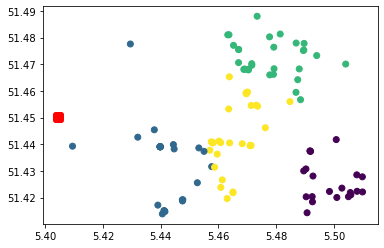

In [108]:
plt.scatter(x='Longitude', y = 'Latitude', c='cluster', data=locations)
centroids = clf.cluster_centers_
plt.scatter(x=depot['Longitude'], y=depot['Latitude'],c='red', marker='s', linewidths=5)

In [109]:
cluster0 = locations.loc[locations['cluster'] == 0]
cluster1 = locations.loc[locations['cluster'] == 1]
cluster2 = locations.loc[locations['cluster'] == 2]
cluster3 = locations.loc[locations['cluster'] == 3]

In [110]:
cluster0.loc[-1] = depot
cluster1.loc[-1] = depot
cluster2.loc[-1] = depot
cluster3.loc[-1] = depot

/home/stijn/anaconda3/envs/spatial/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [117]:
cluster0[["Longitude", "Latitude"]].to_numpy()[0][0]

5.5008128

In [118]:
lon_1, lat_1 = cluster0[["Longitude", "Latitude"]].to_numpy()[0][0], cluster0[["Longitude", "Latitude"]].to_numpy()[0][1]
lon_2, lat_2 = cluster0[["Longitude", "Latitude"]].to_numpy()[1][0], cluster0[["Longitude", "Latitude"]].to_numpy()[1][1]
print(lon_1)
print(lat_1)
print()
print(lon_2)
print(lat_2)

5.5008128
51.4417336

5.4919201
51.4373112


In [119]:
# call the OSMR API
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false&alternatives=false&geometries=polyline""")

# then you load the response using the json libray
# by default you get only one alternative so you access 0-th element of the `routes`

In [120]:
routes = json.loads(r.content)
route_1 = routes.get("routes")[0]
print(route_1)

{'legs': [{'steps': [], 'weight': 96.5, 'distance': 920.1, 'summary': '', 'duration': 96.5}], 'weight_name': 'routability', 'weight': 96.5, 'distance': 920.1, 'duration': 96.5}


In [122]:
df = cluster0

# Initialize the distance matrix
all_locations = np.arange(0, df.shape[0])
distance_matrix = np.ones((df.shape[0], df.shape[0]))
#route_matrix = np.ones((flower_dataframe_geo.shape[0], flower_dataframe_geo.shape[0]))


# Fill the distance matrix and  with OSMR distances and route_matrix with OSMR routes
for i in all_locations:
    
    for j in all_locations:
        # get lon en lat
        lon_1, lat_1 = df[["Longitude", "Latitude"]].to_numpy()[i][0], df[["Longitude", "Latitude"]].to_numpy()[i][1]
        lon_2, lat_2 = df[["Longitude", "Latitude"]].to_numpy()[j][0], df[["Longitude", "Latitude"]].to_numpy()[j][1]
        # call the OSMR API
        r = requests.get(f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false&alternatives=false""")
        # load the response using the json libray
        routes = json.loads(r.content)
        # fill route_matrix
        #route_matrix[i, j] = routes.get("routes")[0].get('distance')
        # fill distance_matrix
        distance_matrix[i, j] = routes.get("routes")[0].get('distance')
        
print(all_locations)
print()
print(distance_matrix)

distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix

distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix gezet.
distance in de matix